In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [168]:
data=pd.read_csv("Social_Network_Ads.csv")

In [169]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [170]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [171]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0);

In [173]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [174]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=20)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=20)

In [175]:
y_pred=classifier.predict(x_test)

In [176]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [177]:
cm

array([[65,  3],
       [ 3, 29]])

In [178]:
plt.rcParams['figure.dpi'] = 125
plt.rcParams['savefig.dpi'] = 125

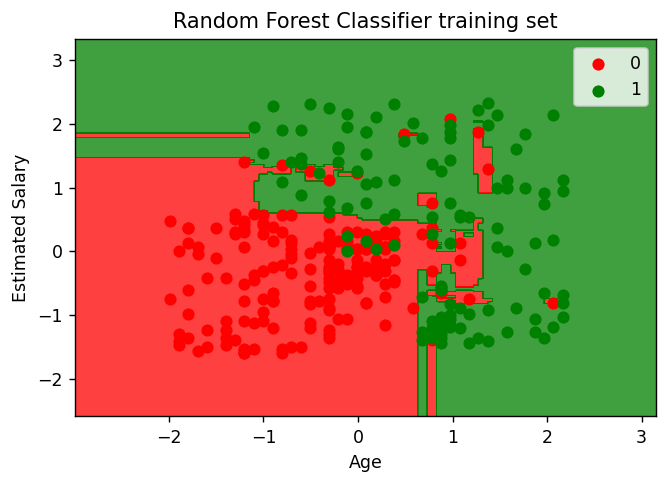

In [179]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1 , stop=x_set[:,0].max()+1 , step=0.01),
                  np.arange(start=x_set[:,1].min()-1 , stop=x_set[:,1].max()+1 , step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
              c=ListedColormap(('red','green'))(i),label=j)
plt.title("Random Forest Classifier training set")
plt.xlabel('Age')
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()
     

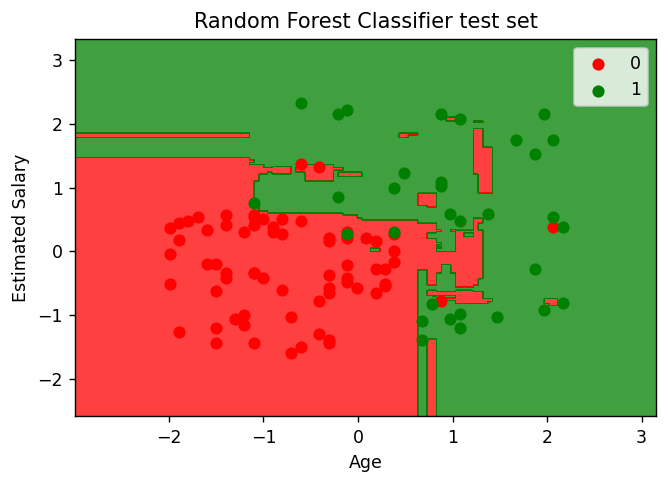

In [180]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
X1,X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1 , stop=x_set[:,0].max()+1 , step=0.01),
                  np.arange(start=x_set[:,1].min()-1 , stop=x_set[:,1].max()+1 , step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
              c=ListedColormap(('red','green'))(i),label=j)
plt.title("Random Forest Classifier test set")
plt.xlabel('Age')
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()